<a href="https://colab.research.google.com/github/erikawawawa/Week-2_Data_Preprocessing/blob/main/ErikaWang_Week2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For Ugrads: use EMODB and merge with RAVDESS; For Grads: Use any of the other datasets, or find your own or create your own emotional voice data (using your own voice recording) and merge that with RAVDESS dataset.**

Hand-sorted files inside my google drive, with the following file structure:

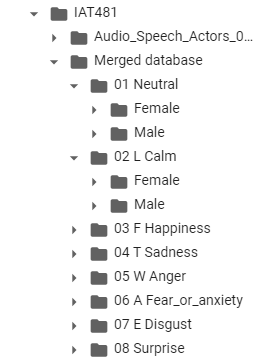

### **Write about how you handled category mismatches and why.**

**RAVDESS:**
- Disregarded fields such as modality, vocal channel, because for this assignment, we were only handling one type.
- Disregarded emotional intensity, statement, repetition, and sex of actor as I felt it did not match the purpose of this assignment: Regardless of how it may alter delivery, the above factors do not change what emotion category each wav file it belongs to, and thus is not what we need to analyze.

**EmoDB:**
- Disregarded 'actor number, 'code for text', and 'version', as it does not alter what emotion category each wav file belongs to.

**Matching emotions:**
- In pairing emotion categories between RAVDESS and EmoDB, most categories felt like they were a given, as they more or less had the same titles.
-- 01 = N (Neutral)
-- 03 = F (Happy)
-- 04 = T (Sadness)
-- 05 = W (Anger)
-- 06 = A (Fear or anxiety)
-- 07 = E (Disgust)


- The two categories to be noted, however are:
-- 02 = L (Calm = boredom):
-- While it it possible to be calm but not bored, I felt that in order to be bored, one first has to be calm. Thus, I feel that the emotion of boredom falls under 'calm', which is reflected in how data was merged in this database.
-- 08 (Surprise) = Did not correlate to any categories from EmoDB, therefore became a standalone category.

### **Analyze the data in terms of gender balance and emotional category balance, show in a graph or visual representation and comment 1-2 sentences on the possible impact of them both.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

**Count the total number of files, total number of male, females, and total of male/female split per category as well as the total:**

In [8]:
def load_mergedDB():

    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/*/*/*.wav"):
        count += 1


    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/*/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/*/Male/*.wav"):
        count3 += 1

    print('\r' + f' Total: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')
    return count, count2, count3

def load_females():
    females = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/*/Female/*.wav"):
          females += 1
          # females.append()
    return females

def load_males():
    males = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/*/Male/*.wav"):
          males += 1
          # females.append()
    return males

load_females(), load_males(), load_mergedDB()

 Total: 1970 audio samples, Female: 1021, Male: 949 

(1021, 949, (1970, 1021, 949))

In [9]:
      count = 0
      count2 = 0
      count3 = 0

      for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/01 Neutral/*/*.wav"):
          count += 1

      for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/01 Neutral/Female/*.wav"):
          count2 += 1

      for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/01 Neutral/Male/*.wav"):
          count3 += 1

      print('\r' + f' Neutral: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Neutral: 175 audio samples, Female: 89, Male: 86 

In [10]:
count = 0
count2 = 0
count3 = 0

for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/02 L Calm/*/*.wav"):
    count += 1

for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/02 L Calm/Female/*.wav"):
    count2 += 1

for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/02 L Calm/Male/*.wav"):
    count3 += 1

    print('\r' + f' Calm: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Calm: 271 audio samples, Female: 142, Male: 129 

In [11]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/03 F Happiness/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/03 F Happiness/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/03 F Happiness/Male/*.wav"):
        count3 += 1

        print('\r' + f' Happy: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Happy: 262 audio samples, Female: 139, Male: 123 

In [16]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/04 T Sadness/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/04 T Sadness/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/04 T Sadness/Male/*.wav"):
        count3 += 1

        print('\r' + f' Sad: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Sad: 254 audio samples, Female: 133, Male: 121 

In [15]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/05 W Anger/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/05 W Anger/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/05 W Anger/Male/*.wav"):
        count3 += 1

        print('\r' + f' Angry: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Angry: 319 audio samples, Female: 163, Male: 156 

In [14]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/06  A Fear_or_anxiety/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/06  A Fear_or_anxiety/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/06  A Fear_or_anxiety/Male/*.wav"):
        count3 += 1

        print('\r' + f' Fear/Anxiety: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Fear/Anxiety: 260 audio samples, Female: 128, Male: 132 

In [13]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/07 E Disgust/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/07 E Disgust/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/07 E Disgust/Male/*.wav"):
        count3 += 1

        print('\r' + f' Disgust: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Disgust: 238 audio samples, Female: 131, Male: 107 

In [12]:
    count = 0
    count2 = 0
    count3 = 0

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/08 Surprise/*/*.wav"):
        count += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/08 Surprise/Female/*.wav"):
        count2 += 1

    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/08 Surprise/Male/*.wav"):
        count3 += 1

        print('\r' + f' Surprise: {count} audio samples,', f'Female: {count2},', f'Male: {count3}', end=' ')

 Surprise: 191 audio samples, Female: 96, Male: 95 

**Analysis**

In terms of gender balance, there are 72 more female voices in the merged database, meaning that females will be more 'studied' by our final product and thus perhaps be easier to accurately represent.

Furthermore, upon evaluating the gender balance per emotional category, it is to be noted that 'Disgust' has 24 more female voice recordings than males, which is significantly more than other categories that also have imbalances, such as 'Happy' with 16 more females, 'Calm' with 13 more females, and 'Sad' with 12 more females. The impact of this may be that 'Disgust' voices from males will be less predictable for the AI model than female voices.

As for emotional categories, 'Angry' has the most robust source of data, while 'Neutral' has the least - as a result, perhaps our final AI model will be likely to be able to less accurately find 'Neutral' voices over 'Angry' voices.


Text(0, 0.5, 'Total')

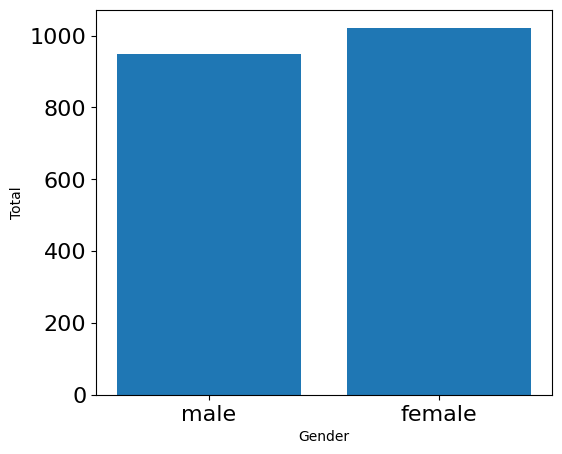

In [17]:
gender = ['male', 'female']
count = [949, 1021]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)

plt.bar(x=gender, height=count)
plt.xticks(ticks=range(2), labels = [g for g in gender], fontsize=10)
plt.xlabel('Gender')

plt.tick_params(labelsize=16)
plt.ylabel('Total')

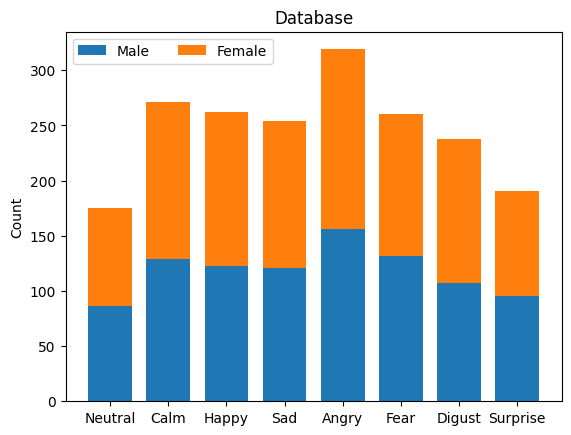

In [18]:
#Stacked bar chart reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

emotions = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fear', 'Digust', 'Surprise')
count = {
    # 'Total': (175, 271, 262, 254, 319, 260, 238, 191),
    'Male': np.array([86, 129, 123, 121, 156, 132, 107, 95]),
    'Female': np.array([89, 142, 139, 133, 163, 128, 131, 96]),
}

fig, ax = plt.subplots()
bottom = np.zeros(8)
width = 0.75


for boolean, c in count.items():
    p = ax.bar(emotions, c, width, label=boolean, bottom=bottom)
    bottom += c

ax.set_ylabel('Count')
ax.set_title('Database')
ax.legend(loc='upper left', ncols=2)

plt.show()

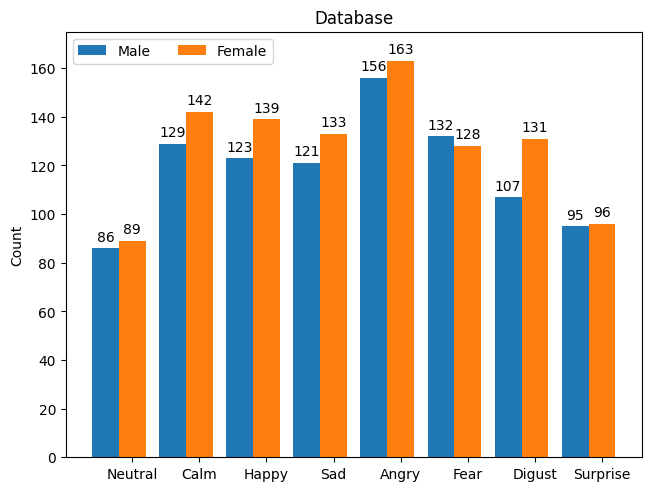

In [19]:
emotions = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fear', 'Digust', 'Surprise')
count = {
    # 'Total': (175, 271, 262, 254, 319, 260, 238, 191),
    'Male': (86, 129, 123, 121, 156, 132, 107, 95),
    'Female': (89, 142, 139, 133, 163, 128, 131, 96),
}

x = np.arange(len(emotions))
fig, ax = plt.subplots(layout='constrained')
width = 0.4
multiplier = 0

for boolean, c in count.items():
    offset = width * multiplier
    p = ax.bar(x + offset, c, width, label=boolean)
    ax.bar_label(p, padding=3)
    multiplier += 1

ax.set_ylabel('Count')
ax.set_title('Database')
ax.legend(loc='upper left', ncols=2)
ax.set_xticks(x + width, emotions)
ax.set_ylim(0, 175)

plt.show()

**Getting functions necessary for dataset**

In [4]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [5]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

**Performing feature extraction on the dataset**

In [7]:
import os, glob

def load_Neutral():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/01 Neutral/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("neutral")
        # '\r' + end='' results in printing over same line
        # print('\r' + f' Processed {count}/{1435} audio samples',end=' ')

    return np.array(X), np.array(y)

def load_Calm():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/02 L Calm/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("calm")

    return np.array(X), np.array(y)

def load_Happiness():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/03 F Happiness/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("happy")

    return np.array(X), np.array(y)

def load_Sadness():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/04 T Sadness/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("sad")

    return np.array(X), np.array(y)

def load_Anger():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/05 W Anger/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("angry")

    return np.array(X), np.array(y)

def load_Fear():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/06  A Fear_or_anxiety/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("fear")

    return np.array(X), np.array(y)

def load_Disgust():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/07 E Disgust/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("disgust")

    return np.array(X), np.array(y)

def load_Surprise():

    count = 0
    X,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/IAT481/Merged database/08 Surprise/*/*.wav"):
        file_name=os.path.basename(file)

        count += 1
        features = get_features(file)

        X.append(features)
        y.append("surprise")

    return np.array(X), np.array(y)